# 연구과제 풀이

## 패키지 가져오기

In [36]:
import warnings
warnings.filterwarnings(action='ignore')

from hossam.util import *
from hossam.plot import *
from hossam.timeserise import *

from datetime import datetime as dt

## 문제 1

### 데이터 가져오기

In [2]:
origin = my_read_excel("https://data.hossam.kr/tsdata/temperatures_seoul.xlsx", index_col="날짜", timeindex=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18299 entries, 1973-07-01 to 2023-08-06
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   평균기온(℃)  18299 non-null  float64
dtypes: float64(1)
memory usage: 285.9 KB
None

데이터프레임 상위 5개 행
+---------------------+---------------+
| 날짜                |   평균기온(℃) |
|---------------------+---------------|
| 1973-07-01 00:00:00 |          22.7 |
| 1973-07-02 00:00:00 |          23.8 |
| 1973-07-03 00:00:00 |          27.2 |
| 1973-07-04 00:00:00 |          25.2 |
| 1973-07-05 00:00:00 |          26.9 |
+---------------------+---------------+

데이터프레임 하위 5개 행
+---------------------+---------------+
| 날짜                |   평균기온(℃) |
|---------------------+---------------|
| 2023-08-02 00:00:00 |          29.7 |
| 2023-08-03 00:00:00 |          29.5 |
| 2023-08-04 00:00:00 |            30 |
| 2023-08-05 00:00:00 |          30.3 |
| 2023-08-06 00:00:00 |          29.8 |
+-------------

### 데이터 추출

데이터가 너무 많으므로 최근 5년치 데이터만으로 검정을 시도함

In [12]:
df = origin.tail(365*5)
my_pretty_table(df.head())

+---------------------+---------------+
| 날짜                |   평균기온(℃) |
|---------------------+---------------|
| 2018-08-08 00:00:00 |            31 |
| 2018-08-09 00:00:00 |          28.8 |
| 2018-08-10 00:00:00 |          30.7 |
| 2018-08-11 00:00:00 |            31 |
| 2018-08-12 00:00:00 |          30.6 |
+---------------------+---------------+


### 평균이동

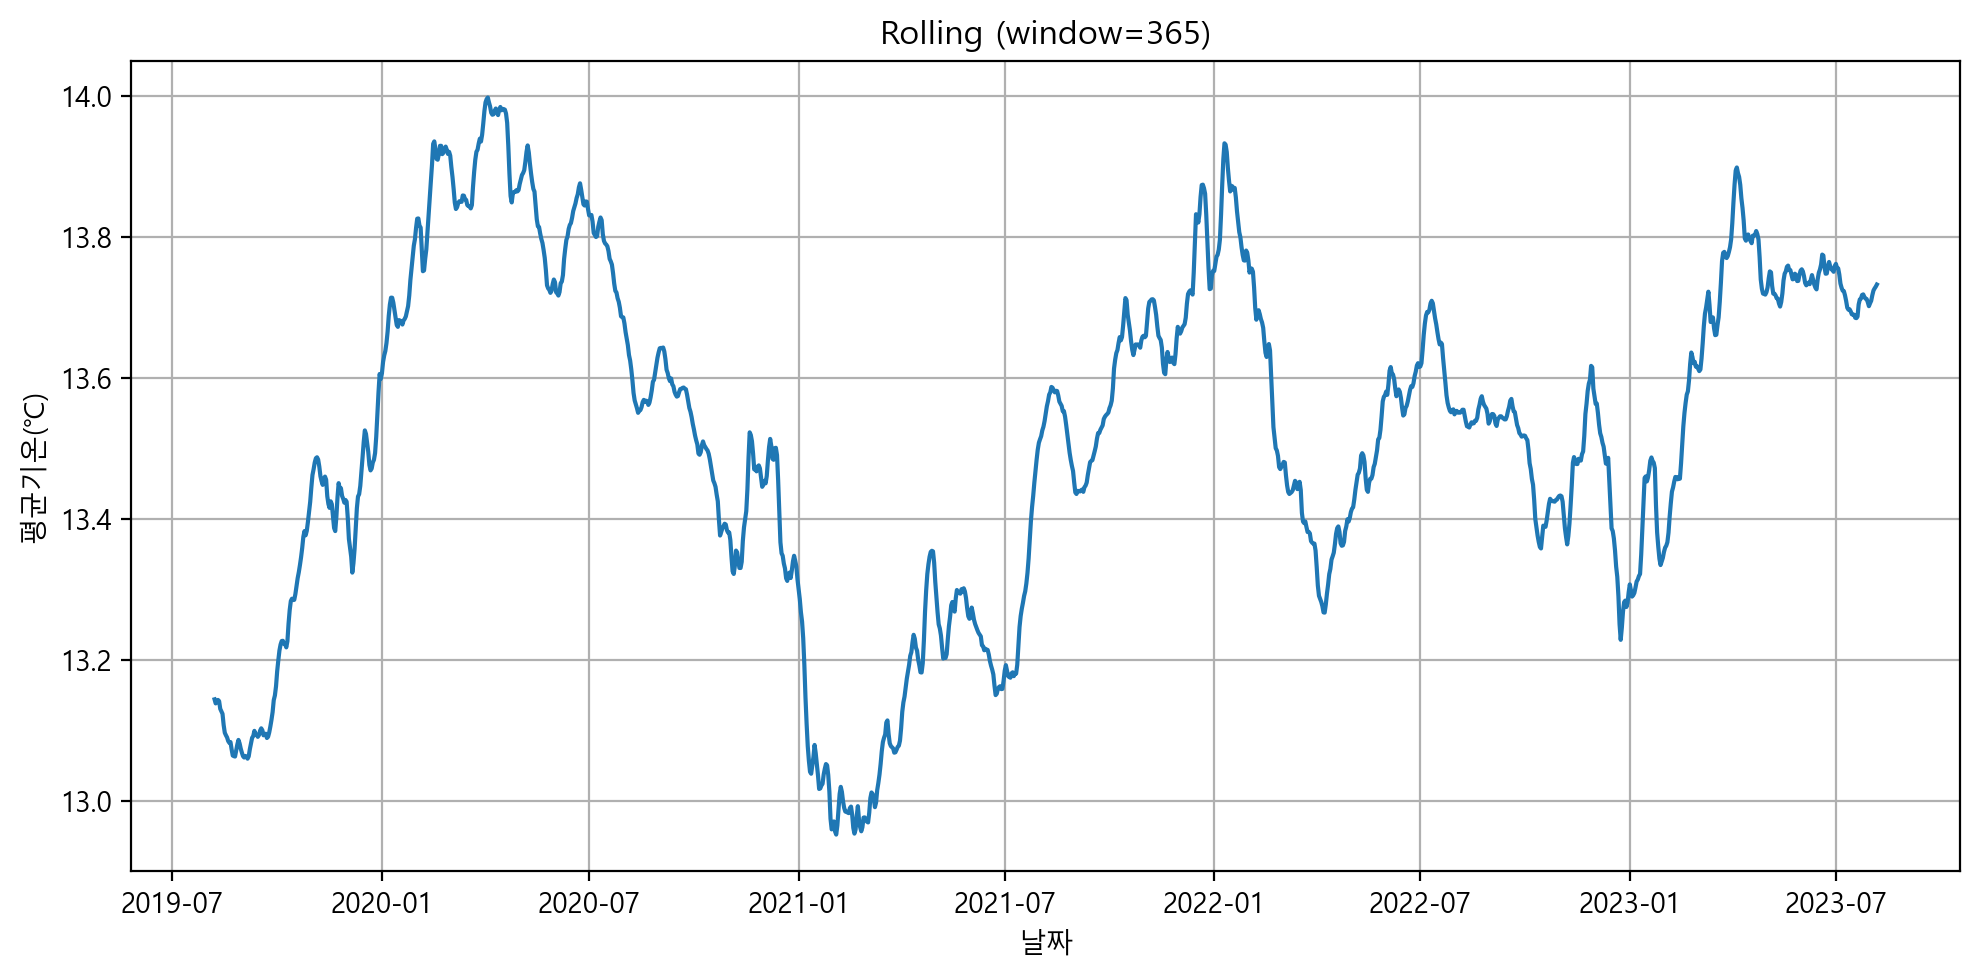

날짜
2018-08-08          NaN
2018-08-09          NaN
2018-08-10          NaN
2018-08-11          NaN
2018-08-12          NaN
                ...    
2023-08-02    13.717534
2023-08-03    13.724110
2023-08-04    13.727123
2023-08-05    13.729589
2023-08-06    13.732603
Name: 평균기온(℃), Length: 1825, dtype: float64

In [13]:
my_rolling(df['평균기온(℃)'], window=365, dpi=200)

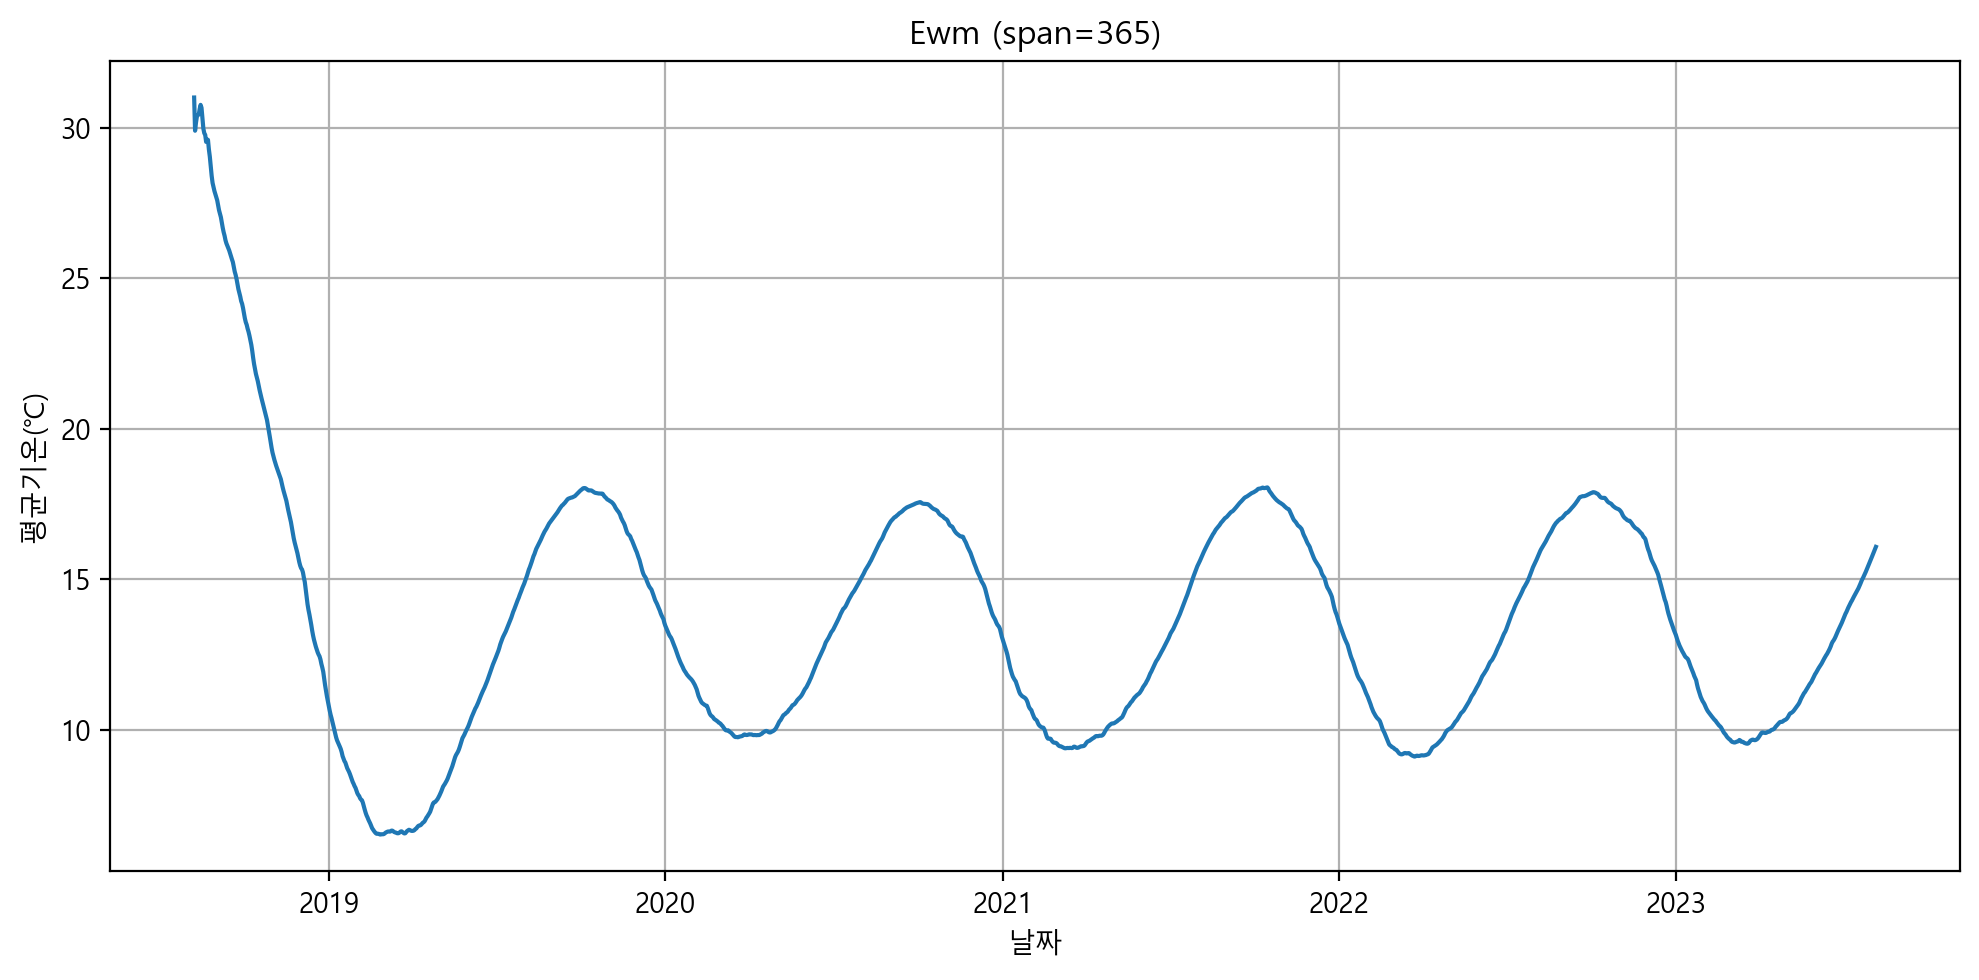

날짜
2018-08-08    31.000000
2018-08-09    29.896986
2018-08-10    30.166126
2018-08-11    30.376311
2018-08-12    30.421540
                ...    
2023-08-02    15.767316
2023-08-03    15.842361
2023-08-04    15.919729
2023-08-05    15.998313
2023-08-06    16.073736
Name: 평균기온(℃), Length: 1825, dtype: float64

In [14]:
my_ewm(df['평균기온(℃)'], span=365, dpi=200)

> 평균이 점점 상승하는 추세이고 평균은 계절성이 있는것으로 보인다. 성분 분해에 승법 모델을 적용

### 성분 분해

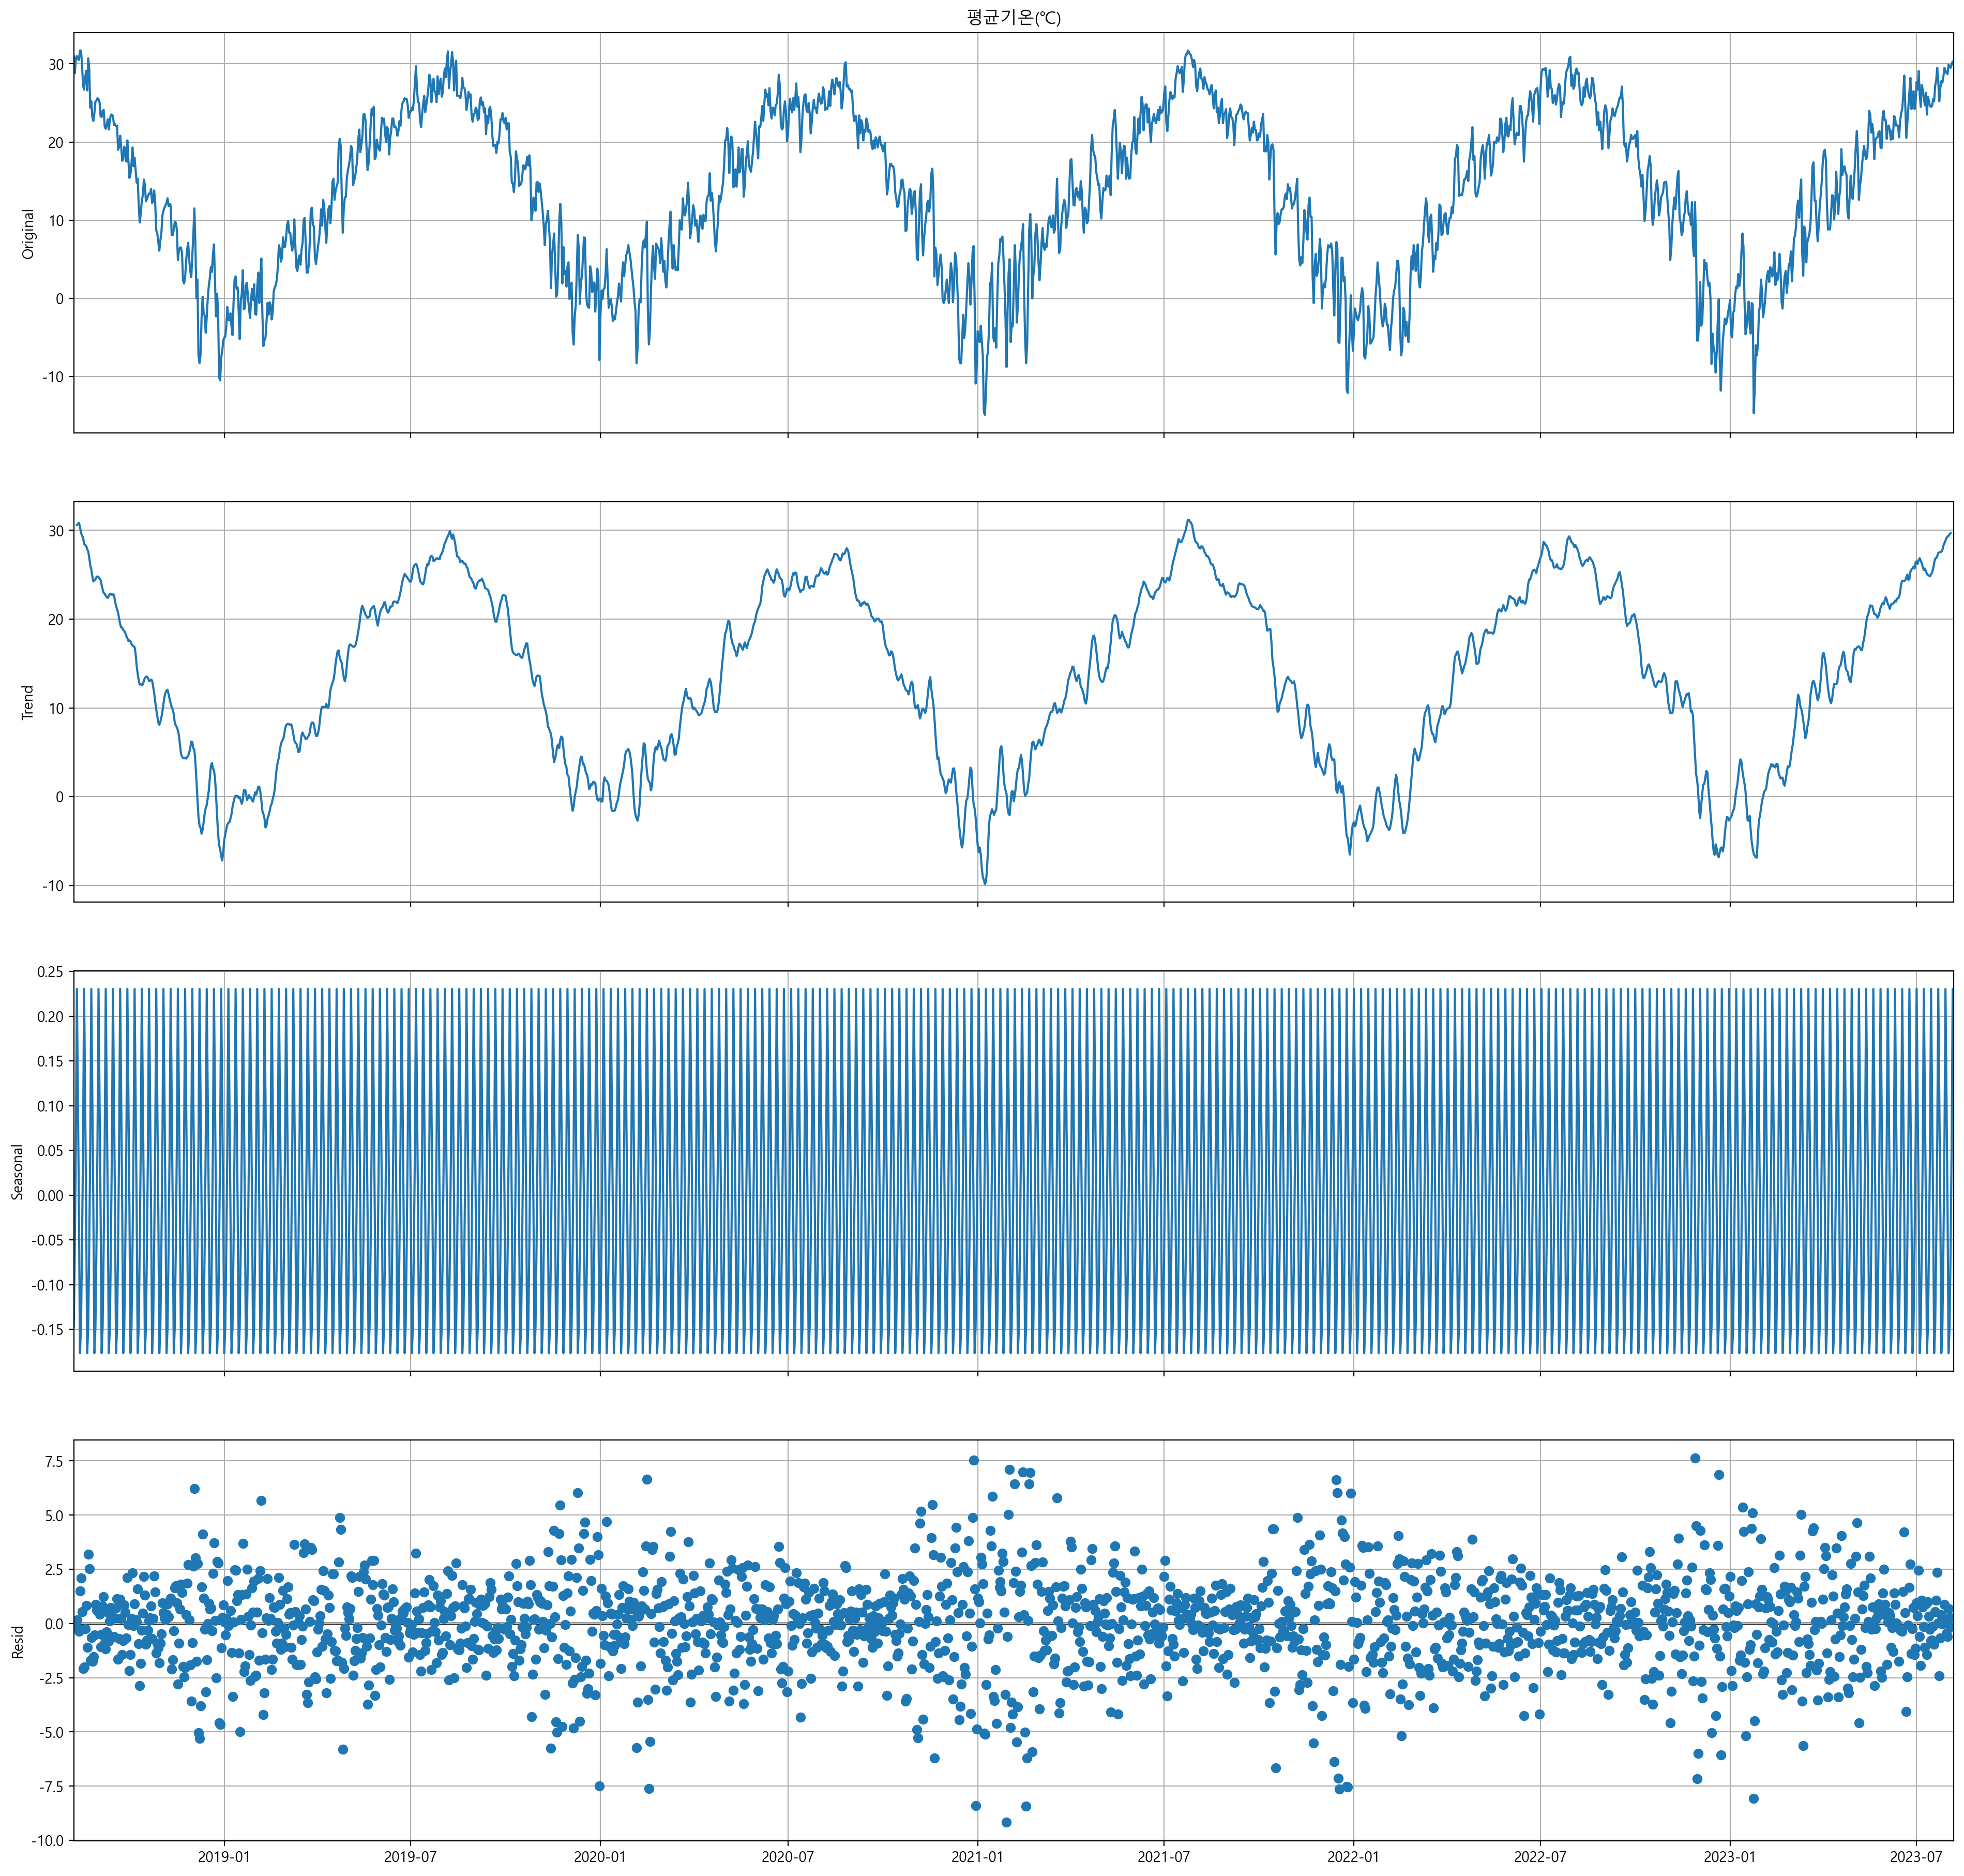

,original,trend,seasonal,resid
날짜,,,,
2018-08-08,31.0,NaN,-0.147339,NaN
2018-08-09,28.8,NaN,-0.057284,NaN
2018-08-10,30.7,NaN,0.056616,NaN
2018-08-11,31.0,30.614286,0.230408,0.155306
2018-08-12,30.6,30.714286,0.108815,-0.223101
...,...,...,...,...
2023-08-02,29.7,29.557143,-0.147339,0.290196
2023-08-03,29.5,29.700000,-0.057284,-0.142716
2023-08-04,30.0,NaN,0.056616,NaN


In [15]:
my_seasonal_decompose(df['평균기온(℃)'], figsize=(20, 5), dpi=200)

> 계절성이 1년 (365일) 단위로 존재함을 확인

### ACF, PACF

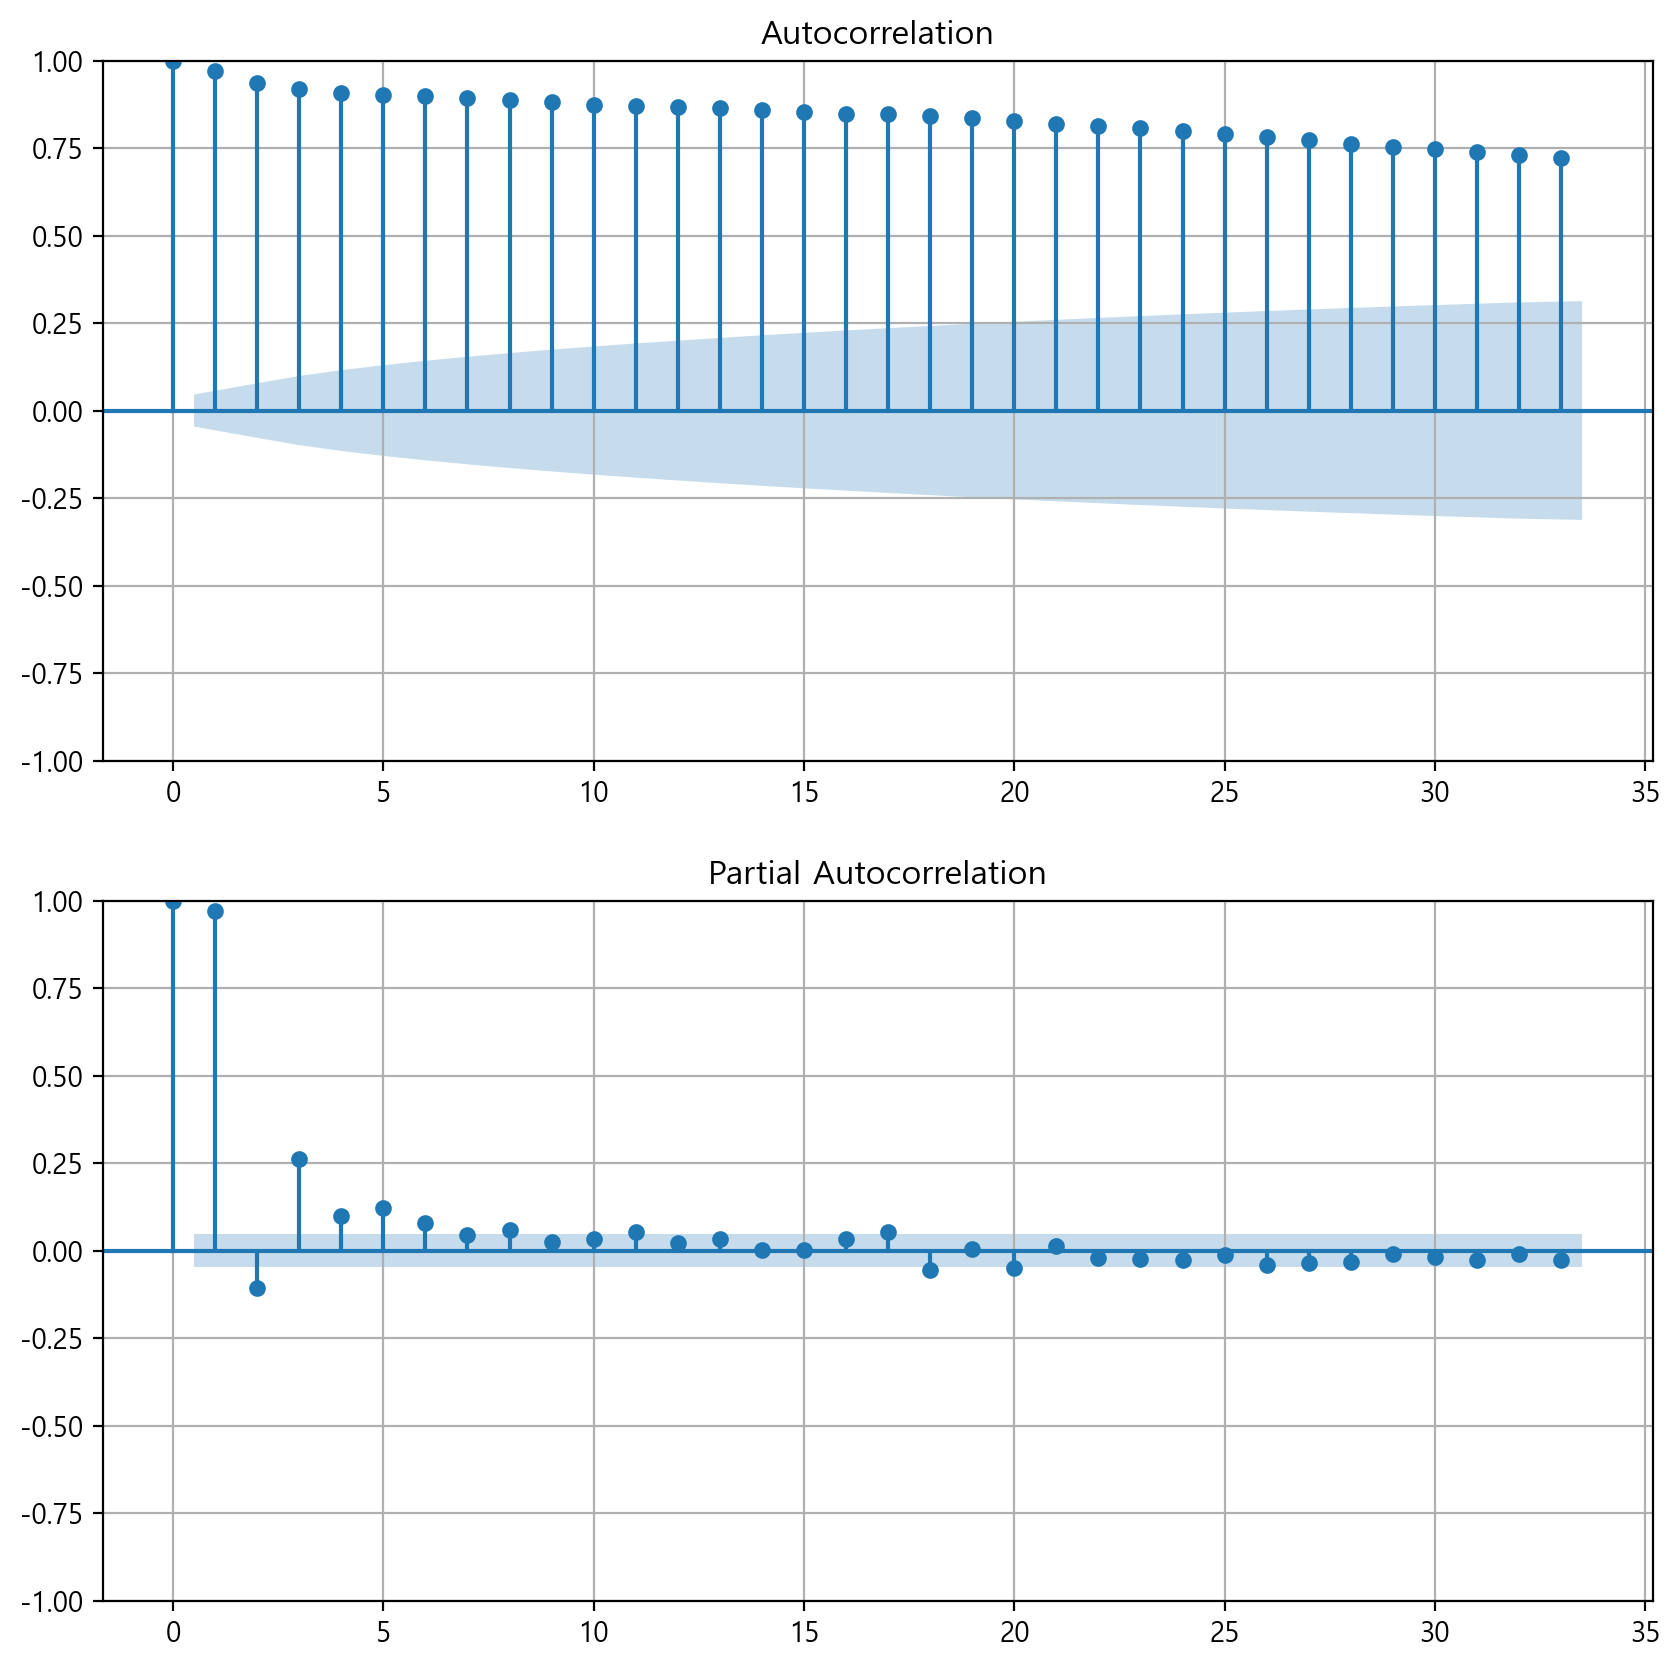

In [16]:
my_acf_pacf_plot(df['평균기온(℃)'], dpi=200)

### 분석 모형 생성

> 날씨에 대한 데이터이므로 계절성은 1년마다 돌아온다고 보는 것이 맞지만 컴퓨터 성능상의 한계로 계절성을 1주일 단위(=7일)로 제한함

In [10]:
train, test = my_timeseries_split(df)

                                    SARIMAX Results                                     
Dep. Variable:                          평균기온(℃)   No. Observations:                  876
Model:             ARIMA(1, 0, 0)x(1, 0, 0, 30)   Log Likelihood               -2054.557
Date:                          Tue, 12 Mar 2024   AIC                           4117.113
Time:                                  15:43:29   BIC                           4136.215
Sample:                              08-07-2020   HQIC                          4124.420
                                   - 12-30-2022                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.5258      3.560      3.799      0.000       6.547      20.504
ar.L1          0.9699      0.009    104.784      0.

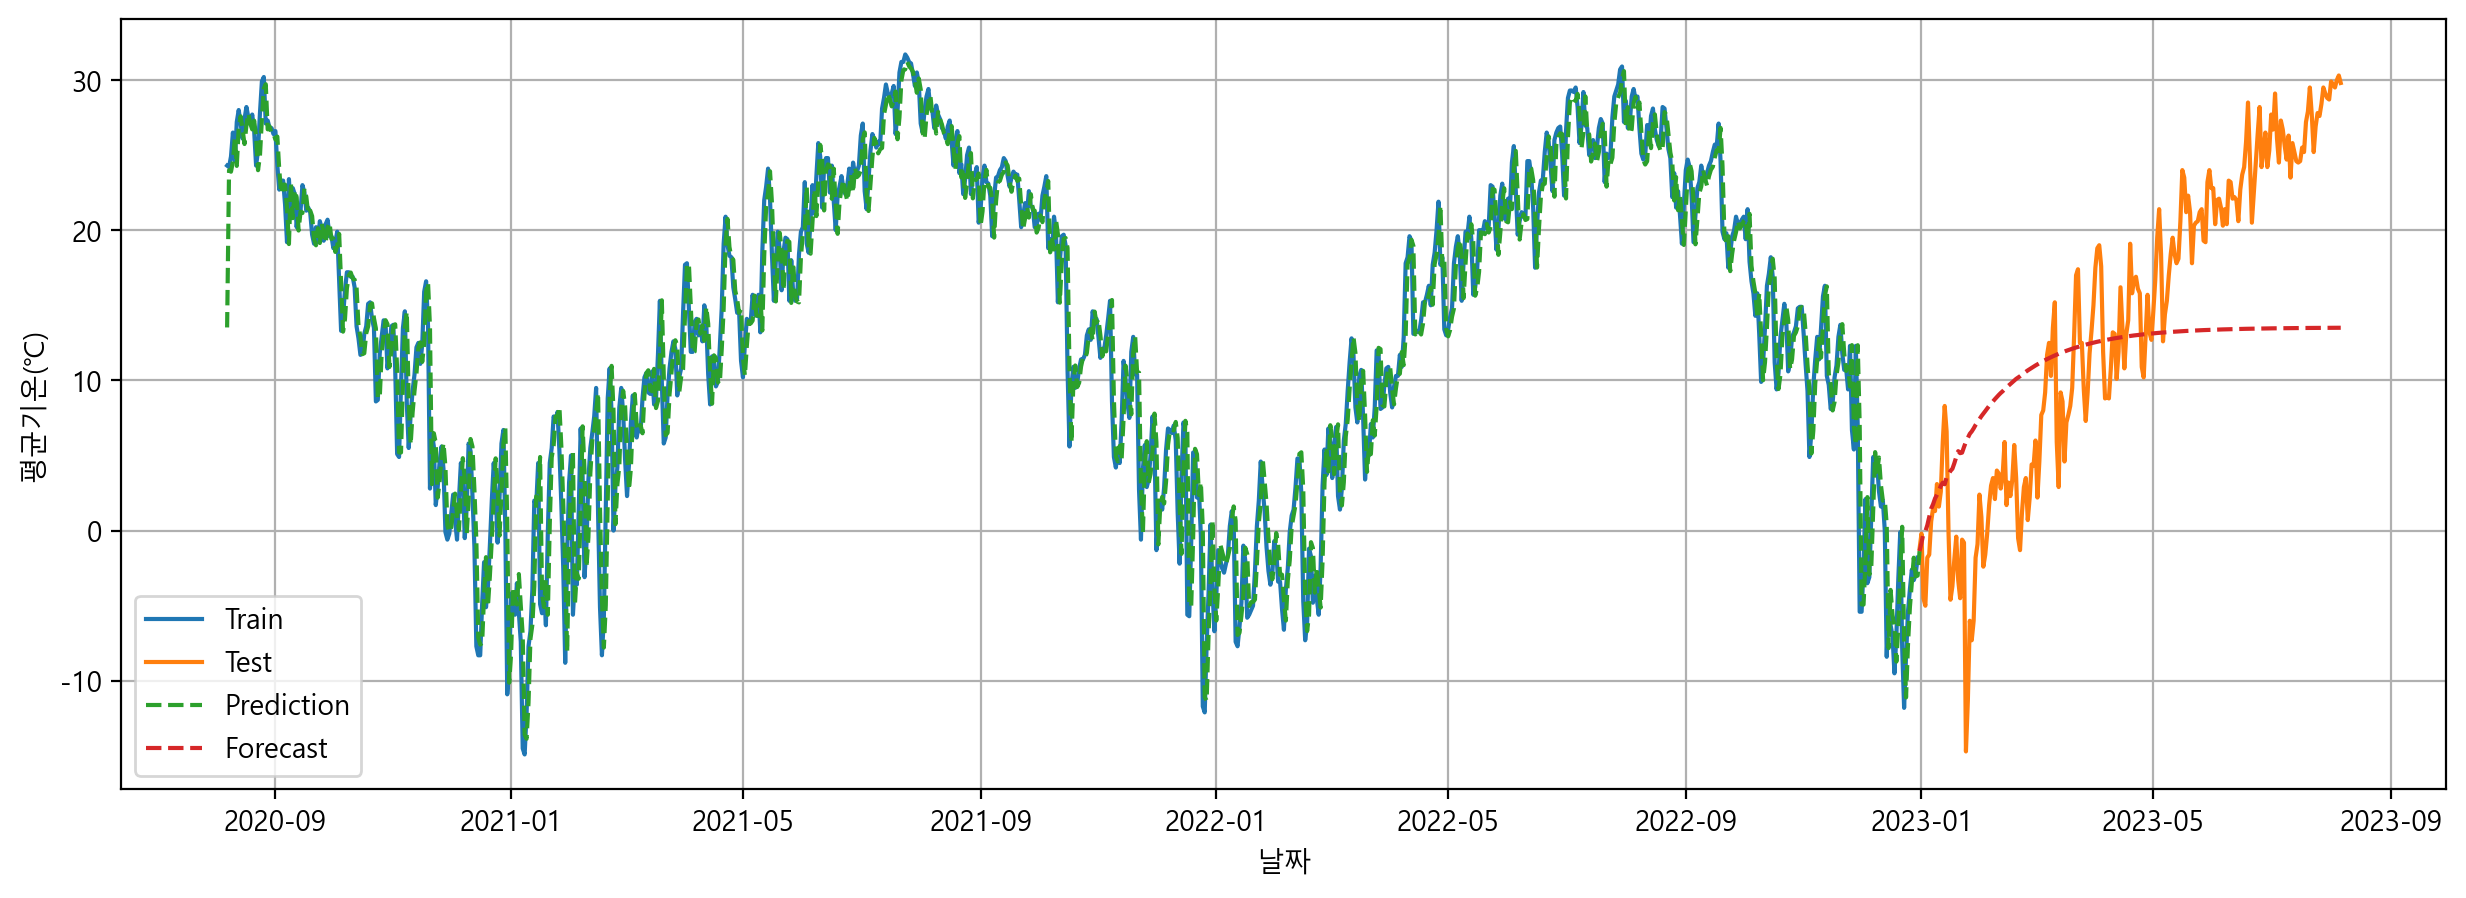

In [19]:
my_arima(train, test, auto=False, p=1, d=0, q=0, s=30, dpi=200)

## 문제 2

### 데이터 가져오기

In [24]:
origin = my_read_excel("https://data.hossam.kr/tsdata/born_baby.xlsx")
origin.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   시점       276 non-null    object
 1   서울특별시    276 non-null    int64 
 2   부산광역시    276 non-null    int64 
 3   대구광역시    276 non-null    int64 
 4   인천광역시    276 non-null    int64 
 5   광주광역시    276 non-null    int64 
 6   대전광역시    276 non-null    int64 
 7   울산광역시    276 non-null    int64 
 8   세종특별자치시  276 non-null    int64 
 9   경기도      276 non-null    int64 
 10  강원도      276 non-null    int64 
 11  충청북도     276 non-null    int64 
 12  충청남도     276 non-null    int64 
 13  전라북도     276 non-null    int64 
 14  전라남도     276 non-null    int64 
 15  경상북도     276 non-null    int64 
 16  경상남도     276 non-null    int64 
 17  제주특별자치도  276 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 38.9+ KB
None

데이터프레임 상위 5개 행
+----+-------------+--------------+--------------+--------------+--------------+--

,시점,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
0,2000년 01월,12866,3752,3057,3320,2159,1859,1479,0,13527,1966,1903,2398,2547,2679,3362,3928,842
1,2000년 02월,11797,3632,2698,3069,1916,1752,1388,0,12437,1780,1722,2273,2296,2366,3221,3612,764
2,2000년 03월,12453,3935,3057,3267,1893,1835,1524,0,13157,1803,1805,2269,2384,2423,3292,3972,809
3,2000년 04월,10782,3464,2753,2683,1773,1690,1360,0,11698,1612,1647,2076,2054,2157,2968,3661,680
4,2000년 05월,10817,3511,2785,2782,1698,1599,1311,0,11362,1615,1652,1988,2041,2109,2973,3516,733


### 데이터 전처리

#### 시간 형식의 인덱스 생성

In [37]:
df = origin.copy()
df['시점'] = df['시점'].apply(lambda x : dt.strptime(x, "%Y년 %m월"))
df.set_index('시점', inplace=True)

my_pretty_table(df.head())

+---------------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+------------------+----------+----------+------------+------------+------------+------------+------------+------------+------------------+
| 시점                |   서울특별시 |   부산광역시 |   대구광역시 |   인천광역시 |   광주광역시 |   대전광역시 |   울산광역시 |   세종특별자치시 |   경기도 |   강원도 |   충청북도 |   충청남도 |   전라북도 |   전라남도 |   경상북도 |   경상남도 |   제주특별자치도 |
|---------------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+------------------+----------+----------+------------+------------+------------+------------+------------+------------+------------------|
| 2000-01-01 00:00:00 |        12866 |         3752 |         3057 |         3320 |         2159 |         1859 |         1479 |                0 |    13527 |     1966 |       1903 |       2398 |       2547 |       2679 |       3362 |       3928 |              842 |
| 2000-02-01 

#### 전국 출생률 합산

In [39]:
df['전국'] = df.sum(axis=1)
df

,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도,전국
시점,,,,,,,,,,,,,,,,,,
2000-01-01,12866,3752,3057,3320,2159,1859,1479,0,13527,1966,1903,2398,2547,2679,3362,3928,842,61644.0
2000-02-01,11797,3632,2698,3069,1916,1752,1388,0,12437,1780,1722,2273,2296,2366,3221,3612,764,56723.0
2000-03-01,12453,3935,3057,3267,1893,1835,1524,0,13157,1803,1805,2269,2384,2423,3292,3972,809,59878.0
2000-04-01,10782,3464,2753,2683,1773,1690,1360,0,11698,1612,1647,2076,2054,2157,2968,3661,680,53058.0
2000-05-01,10817,3511,2785,2782,1698,1599,1311,0,11362,1615,1652,1988,2041,2109,2973,3516,733,52492.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,3670,1249,854,1265,643,768,448,236,6635,632,676,928,577,686,975,1182,358,21782.0
2022-09-01,3651,1209,863,1262,681,705,490,269,6657,650,663,889,596,766,989,1264,314,21918.0
2022-10-01,3612,1166,848,1200,632,656,445,276,6154,613,583,848,577,642,959,1157,278,20646.0


#### 필요한 데이터만 추출

In [40]:
df2 = df[['전국']]
my_pretty_table(df2.head())

+---------------------+--------+
| 시점                |   전국 |
|---------------------+--------|
| 2000-01-01 00:00:00 |  61644 |
| 2000-02-01 00:00:00 |  56723 |
| 2000-03-01 00:00:00 |  59878 |
| 2000-04-01 00:00:00 |  53058 |
| 2000-05-01 00:00:00 |  52492 |
+---------------------+--------+


### 성분분해

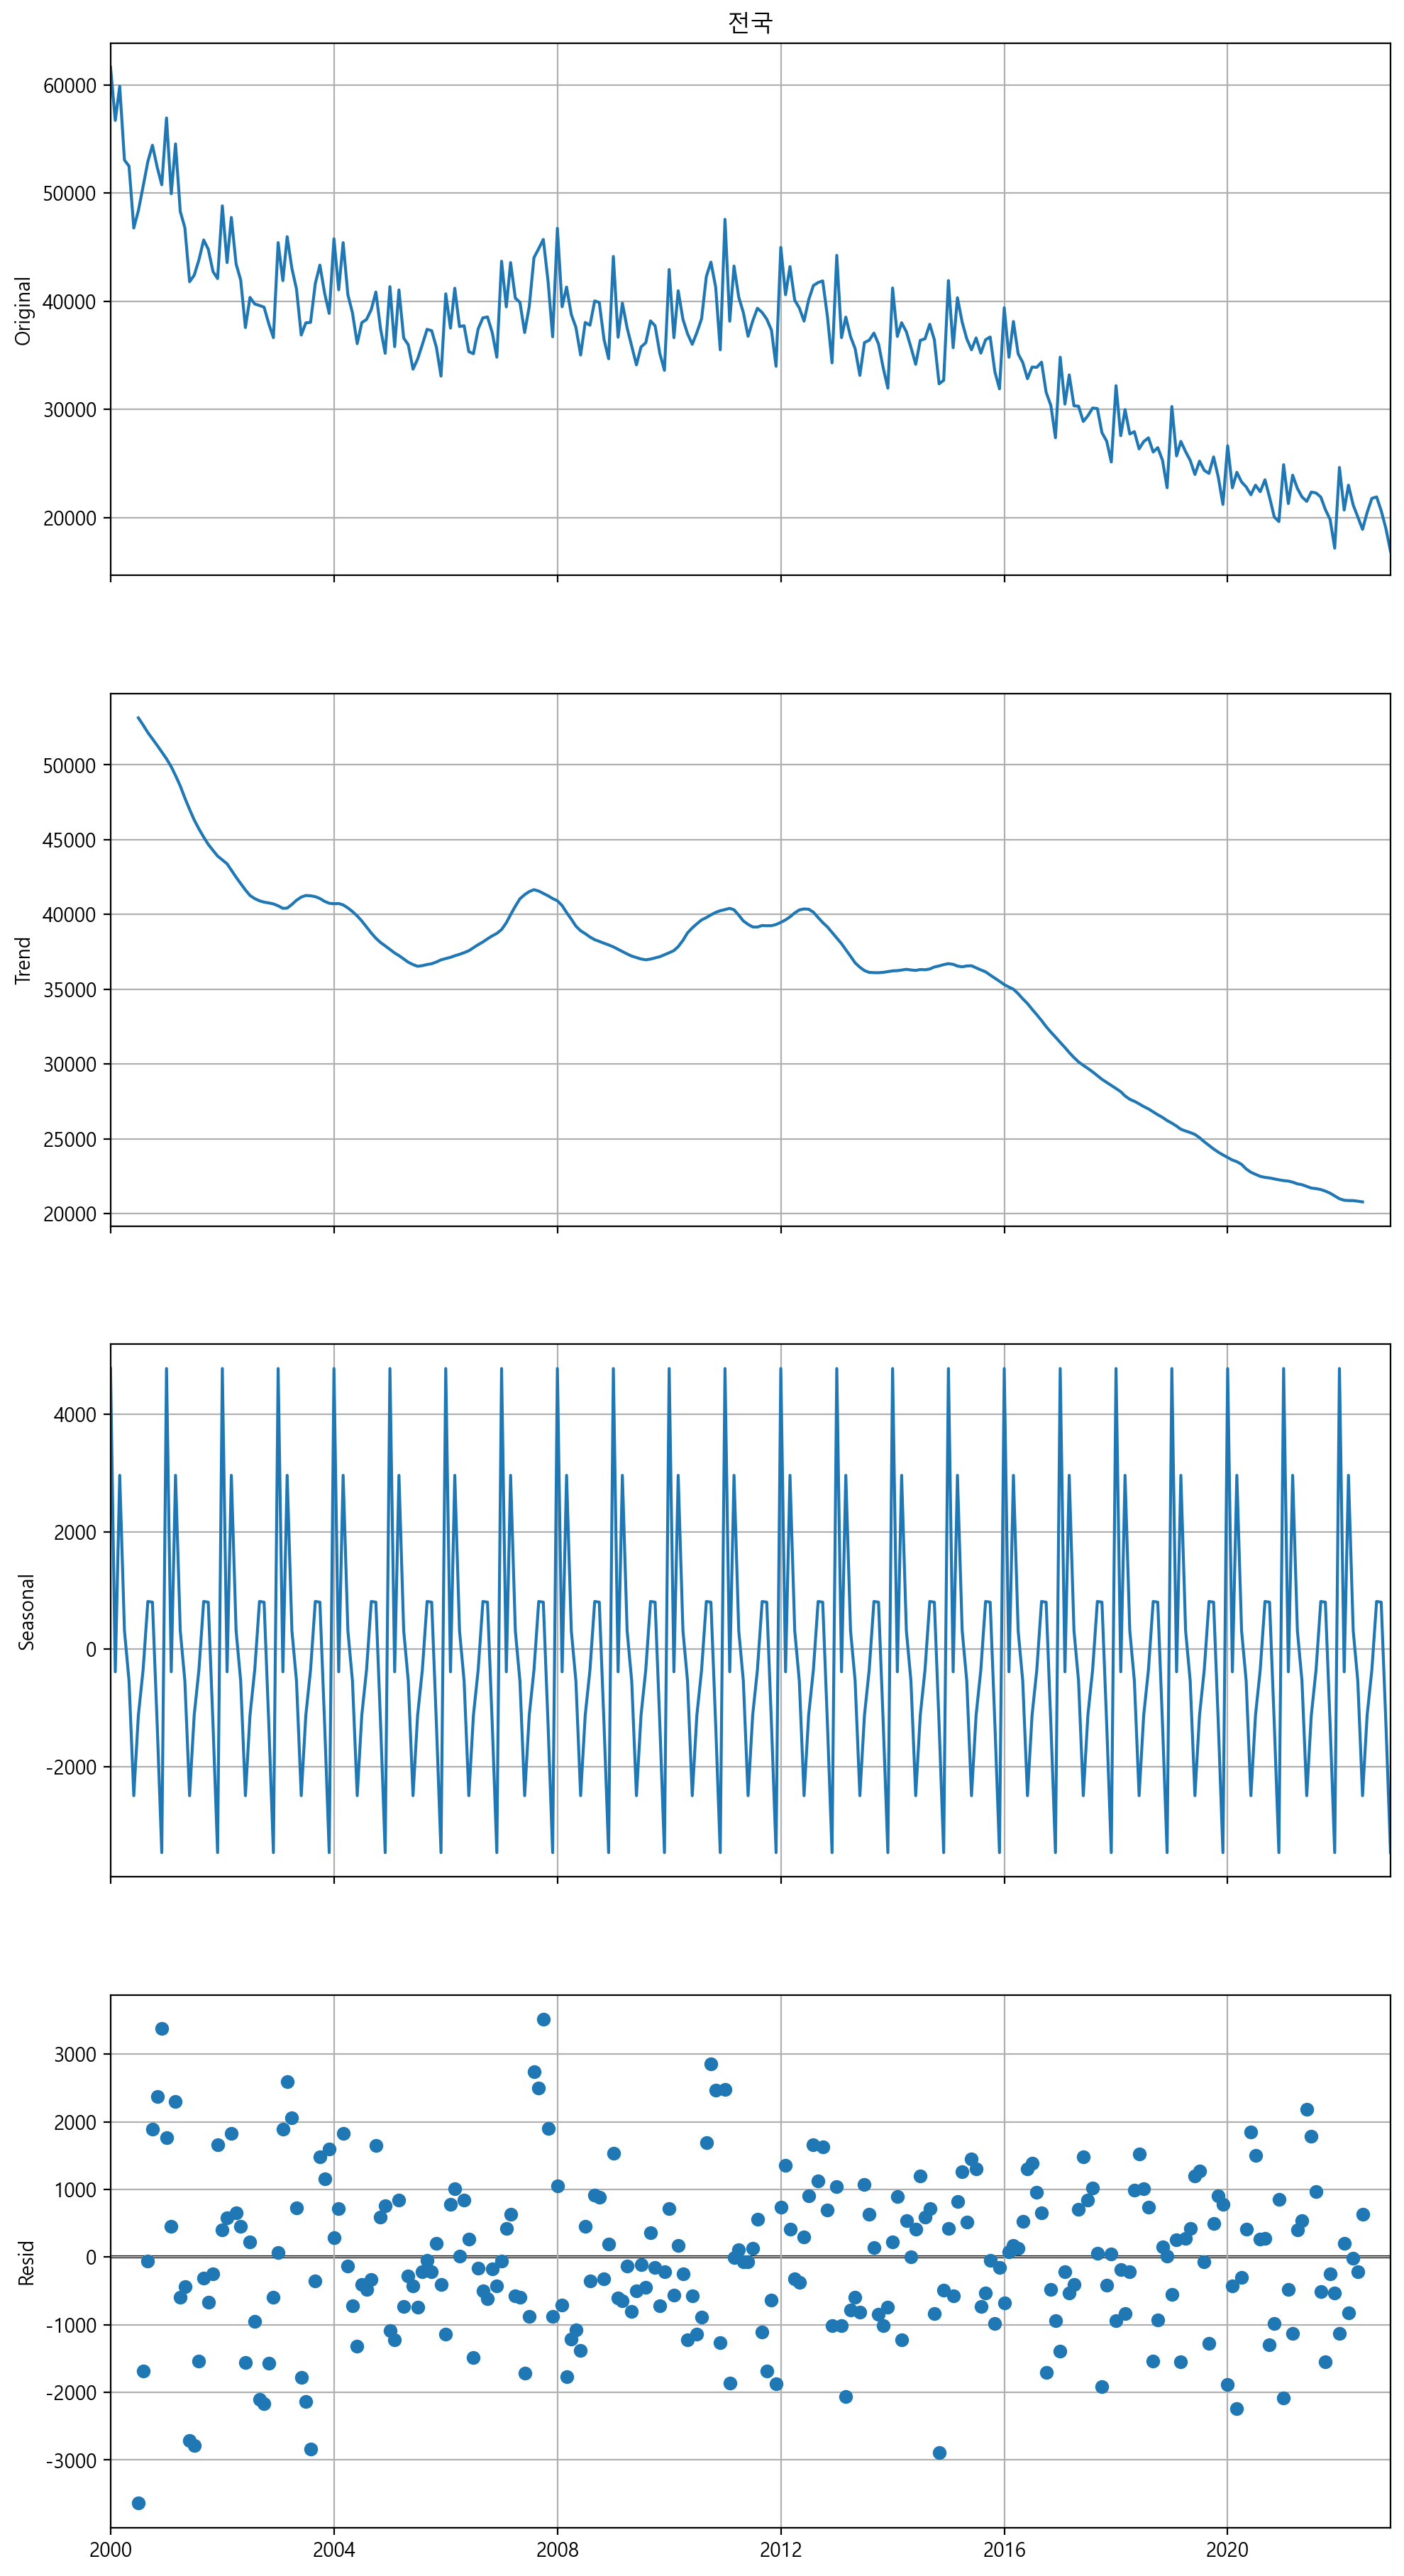

,original,trend,seasonal,resid
시점,,,,
2000-01-01,61644.0,NaN,4779.429451,NaN
2000-02-01,56723.0,NaN,-386.602746,NaN
2000-03-01,59878.0,NaN,2959.586648,NaN
2000-04-01,53058.0,NaN,313.363163,NaN
2000-05-01,52492.0,NaN,-543.445549,NaN
...,...,...,...,...
2022-08-01,21782.0,NaN,-354.701231,NaN
2022-09-01,21918.0,NaN,810.683239,NaN
2022-10-01,20646.0,NaN,798.796875,NaN


In [42]:
my_seasonal_decompose(df2['전국'],dpi=200)

> 계절성이 1년 주기인것으로 판단되어 12 단위로 s값을 설정하기로 함

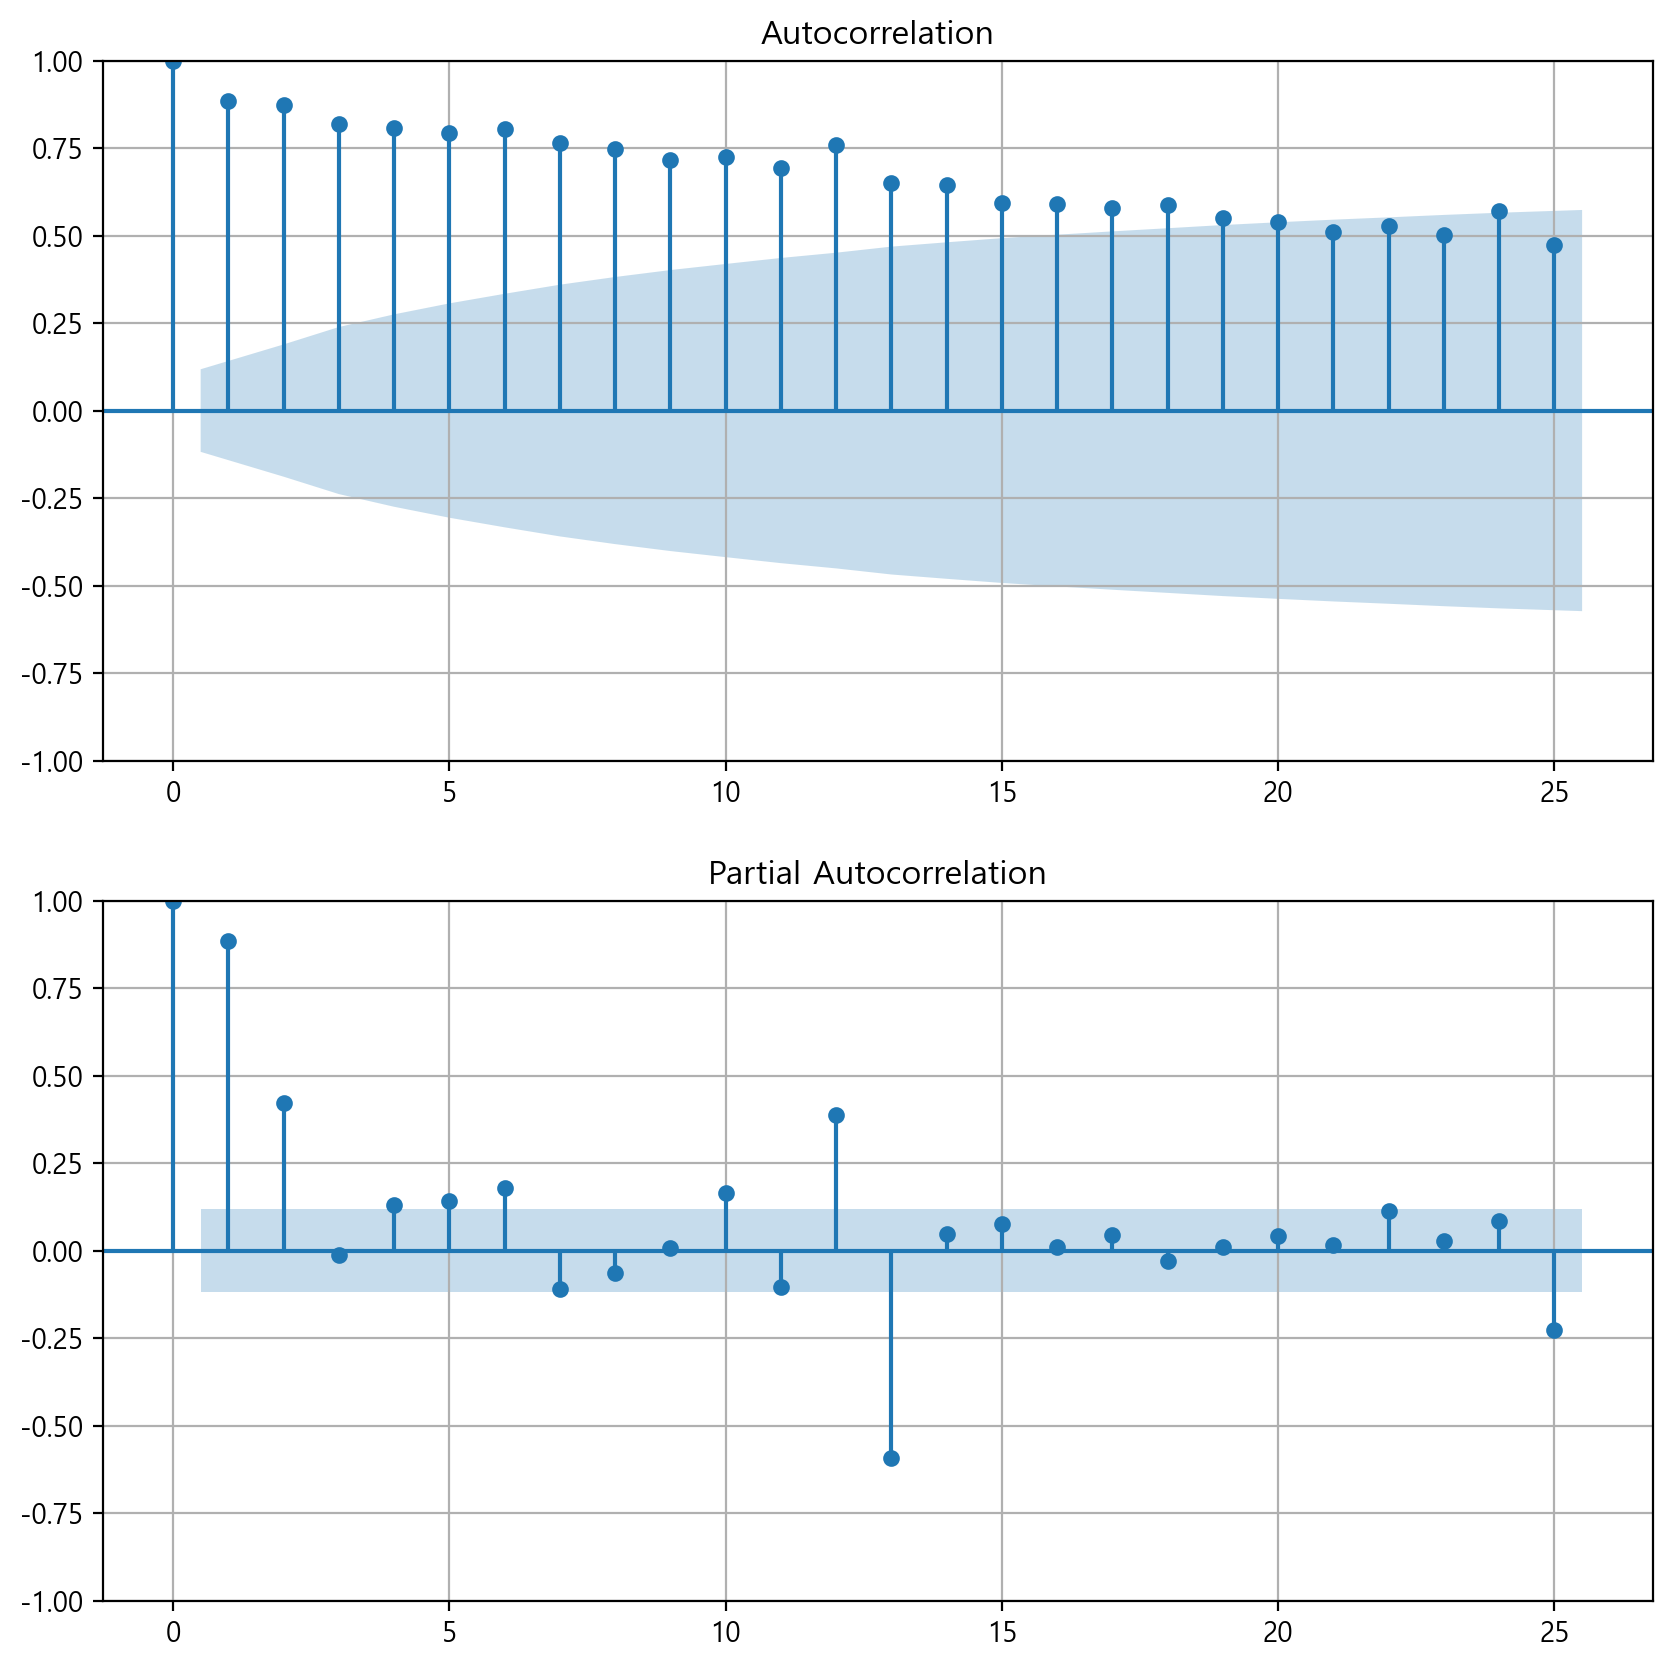

In [45]:
my_acf_pacf_plot(df2['전국'], dpi=200)

In [43]:
train, test = my_timeseries_split(df2)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3602.303, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3595.853, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=3591.642, Time=0.17 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=3604.331, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.61 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=3576.973, Time=0.58 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=2.26 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=3573.672, Time=0.42 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=3589.786, Time=0.10 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=3569.917, Time=0.89 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=1.36 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=0.72 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=3574.025, Time=0.91 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=3

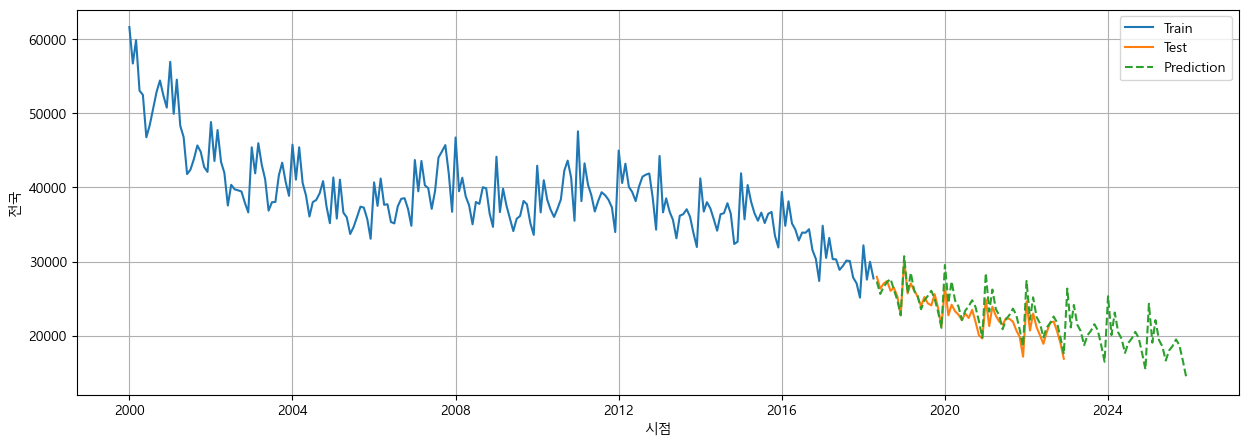

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(1, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [52]:
my_arima(train, test, auto=True, p=2, d=1, q=2, s=12, periods=36)